


00 teams---------------------------------------------------------------------------------------------



   id  team_api_id  team_fifa_api_id    team_long_name team_short_name
0   1         9987             673.0          KRC Genk             GEN
1   2         9993             675.0      Beerschot AC             BAC
2   3        10000           15005.0  SV Zulte-Waregem             ZUL



01 countires---------------------------------------------------------------------------------------------



     id     name
0     1  Belgium
1  1729  England
2  4769   France



03 note---------------------------------------------------------------------------------------------



Its quite clear that we cannot merge countires and teams as they donot have a common column



04 matches---------------------------------------------------------------------------------------------



     id  country_id  league_id     season  stage                 date  \
0  1489           1          1  2015/2016     

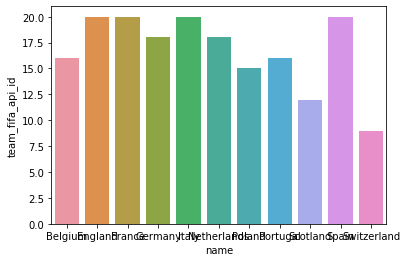

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('\n\n\n00 teams---------------------------------------------------------------------------------------------\n\n\n')
#Lets load the Team.csv to teams dataframe
teams = pd.read_csv('football/Team.csv')
#Let's have a loot at the first 3 rows
print(teams.head(3))


print('\n\n\n01 countires---------------------------------------------------------------------------------------------\n\n\n')
#Lets load the Country.csv to countries dataframe
countries = pd.read_csv('football/Country.csv')
#Let's have a loot at the first 3 rows
print(countries.head(3))


print('\n\n\n03 note---------------------------------------------------------------------------------------------\n\n\n')
print('Its quite clear that we cannot merge countires and teams as they donot have a common column')
print('\n\n\n04 matches---------------------------------------------------------------------------------------------\n\n\n')


#Lets load the Match.csv to matches dataframe
matches = pd.read_csv('football/match.csv')
#Let's have a loot at the first 3 rows
print(matches.head(3))


print('\n\n\n05 note---------------------------------------------------------------------------------------------\n\n\n')
print('we can find both the columns for country id and team_api_id in matches. So using this we can merge countries and teams')

print('\n\n\n06 ---------------------------------------------------------------------------------------------\n\n\n')
print("""we have two team Api Id, home and away, so 
            \n1. Create a dataframe with country_id and home_team_api_id as we donot need other columns.
            \n2. Create a dataframe with country_id and away_team_api_id and another with country_id and home_team_api_id
            \3. Rename both dataframes' columns to same name for appending, country_id and team_api_id for now
            \4. Append the dataframes""")


print('\n\n\n07 ---------------------------------------------------------------------------------------------\n\n\n')
#selecting only the essential columns and creating a new dataframes
df_hteams=matches[['country_id','home_team_api_id']]
df_ateams=matches[['country_id','away_team_api_id']]

#renaming both dataframes' columns to same name for appending
df_hteams.columns=['country_id','team_api_id']
df_ateams.columns=['country_id','team_api_id']

#appending both to find all the teams
df_teams= df_hteams.append(df_ateams)

print(df_teams.head(3))


print('\n\n\n08 note---------------------------------------------------------------------------------------------\n\n\n')
print('Lets find only the unique team api ids, and remove duplicates using groupb\y')

print('\n\n\n09 Removing Duplicates---------------------------------------------------------------------------------------------\n\n\n')
#removing duplicate team_api_ids
df_teams_unique=df_teams.groupby(['team_api_id'],as_index=False).first()
print(df_teams_unique.head(3))


print('\n\n\n010 df_team_countries = merge df_team_unique and countries-----------------------------------------------------------------------------\n\n\n')
#Merging countires and df_team_unique to create df_teams_countries according to country_id
df_teams_countries= pd.merge(countries,df_teams_unique, how='inner',left_on='id',right_on='country_id')
print(df_teams_countries.head(3))


print('\n\n\n011 df_team_countries_final-----------------------------------------------------------------------------\n\n\n')
#Merging teams and df_teams_countries to create df_teams_countries_final according to team_api_id
df_teams_countries_final= pd.merge(teams,df_teams_countries, how='inner',left_on='team_api_id',right_on='team_api_id')
print(df_teams_countries_final.head(3))

print('\n\n\n12 df_team_countries_final -----------------------------------------------------------------------------\n\n\n')

#removing unnecessary columns
df_teams_countries_final=df_teams_countries_final[['country_id','name','team_fifa_api_id','team_short_name','team_long_name']]
print(df_teams_countries_final.head())

print('\n\n\n13 Counting the number of teams accoring to countires -----------------------------------------------------------------------------\n\n\n')
df_teams_name_count=df_teams_countries_final.groupby(['name'],as_index=False).count()[['name','team_fifa_api_id']]
print(df_teams_name_count.head())

print('\n\n\n14 Plot -----------------------------------------------------------------------------\n\n\n')
sns.barplot(df_teams_name_count.name,df_teams_name_count.team_fifa_api_id);


